# Bayes Classifer with Maximum Likelihood Technique

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# open file and store data into "dataset" variable
file = 'datasets/dataset.csv'
dataset = pd.read_csv(file, header = None, names=['feature1', 'feature2', 'class'])

## Functions definitions

In [2]:
# Function used for scaling of the dataset
def feature_scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

# Function used to calculate the loss
def calculate_loss(pred_output, true_output):
  sq_error = (true_output - pred_output) ** 2
  sum_sq_error = np.sum(sq_error)
  loss = sum_sq_error / len(true_output)
  return loss

## Splitting the dataset and plotting the samples

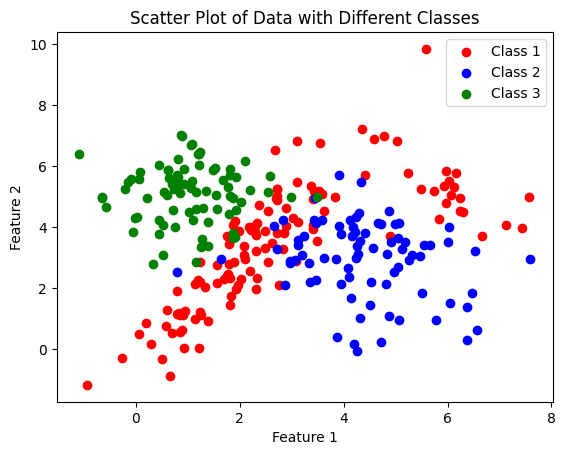

In [3]:
# dividing input (X) and output (y) data
X = dataset.iloc[: , :-1]
y = dataset.iloc[:, [2]]

# splitting the dataset into train and test data with 50-50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)
X_train, X_test = feature_scaling(X_train, X_test)

# Create a scatter plot for each class before the training
colors = {1: 'red', 2: 'blue', 3: 'green'}
for class_label in [1, 2, 3]:
    class_data = dataset[dataset.iloc[:, -1] == class_label]
    plt.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], c=colors[class_label], label=f'Class {class_label}')


# Set labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data with Different Classes')
plt.legend()
plt.show()


## Bayes Classifier Class definitions and functions


In [4]:
class CustomBayesianClassifier:
    def __init__(self):
        self.num_classes = 3
        self.class_means = None
        self.cov_matrices = None
        self.same_cov_matrix = None

    def fit(self, X, y):

        # Calculate the covariance matrix when all the classes use the same one
        self.same_cov_matrix = np.cov(X,rowvar=False)

        # Proccess to calculate the covariance matrices when they are different for each class

        # Initialize dictionaries for each class
        class_dict = {1: [], 2: [], 3: []}

        # Iterate through y_train and populate the dictionaries
        for idx, val in enumerate(y.values):
            class_label = val[0]  # Extract the class label
            class_dict[class_label].append(X[idx])

        # Convert lists to numpy arrays
        for key, value in class_dict.items():
            class_dict[key] = np.array(value)

        # Initialize dictionaries for the meadian and the covarince matrices for each class
        self.class_means = {1: [], 2: [], 3: []}
        self.cov_matrices = {1: [], 2: [], 3: []}

        # Iterate through the dictionaries to each class to calculate the covarince and the median and store them in the dectionaries
        for i in range(1,len(class_dict)+1):
            self.class_means[i] = np.mean(class_dict[i], axis=0)
            self.cov_matrices[i] = np.cov(class_dict[i], rowvar=False)


    # Calculating the probability density function that is used for the Maximum Likelihood technique
    def pdf_likelihood(self, X, mean, cov_matrix):
        n = X.shape[1]  # Number of features
        exp = -1/2 * np.sum((np.dot((X - mean), np.linalg.inv(cov_matrix))* (X - mean)), axis=1)
        denominator = 1 / ((2 * np.pi) ** (n / 2) * np.sqrt(np.linalg.det(cov_matrix))) #
        likelihood = denominator * exp
        return likelihood

    # Calculating the a priori probability
    def a_priori(self, y):
        prob_list = [np.mean(y == c) for c in range(1, self.num_classes + 1)]
        return np.array(prob_list)

    def predict(self, X, y, same):
        likelihoods = np.zeros((X.shape[0], self.num_classes))
        if same:
            for class_id in range(1, self.num_classes + 1):
                class_mask = (y.values.flatten() == class_id)
                likelihoods[:, class_id - 1] = self.pdf_likelihood(X, self.class_means[class_id], self.same_cov_matrix)
        else:
            for class_id in range(1, self.num_classes + 1):
                class_mask = (y.values.flatten() == class_id)
                likelihoods[:, class_id - 1] = self.pdf_likelihood(X, self.class_means[class_id], self.cov_matrices[class_id])
        prior = self.a_priori(y)
        prior = prior.reshape(1, -1)
        # Compute the posterior probabilities for each class
        posteriors = likelihoods * prior
        # Find the class with the maximum posterior probability for each sample
        predictions = np.argmax(posteriors, axis=1) + 1
        return predictions



## Apply the Bayes Classifier in the Dataset for both the same covariance matrix and different ones

In [5]:
# Assuming you have your training data X_train and labels y_train
model = CustomBayesianClassifier()

# Train the model
model.fit(X_train, y_train)

# Results for same and different Covariance matrixes

for i in range(2):
    # Making the pedictions
    predictions = model.predict(X_test, y_test, i)

    # Flatten the y_train DataFrame to match the shape of predictions
    true_labels = y_test.values.flatten()

    # Calculate Results
    accuracy = accuracy_score(true_labels, predictions)
    loss = calculate_loss(predictions, y_test['class'])

    # Calculate the error
    mean_classification_error = mean_absolute_error(true_labels, predictions)

    # Print Results
    if i == 0:
        print(f"Accuracy with Same Covariance Matrix: {accuracy:.2%}")
        print('Loss with Same Covariance Matrix: ', loss)
        print(f"Mean Classification Error with Same Covariance Matrix: {mean_classification_error}")
    else:
        print(f"Accuracy with Different Covariance Matrix: {accuracy:.2%}")
        print('Loss with Different Covariance Matrix: ', loss)
        print(f"Mean Classification Error with Same Covariance Matrix: {mean_classification_error}\n\n\n\n\n\n")

Accuracy with Same Covariance Matrix: 82.14%
Loss with Same Covariance Matrix:  0.32857142857142857
Mean Classification Error with Same Covariance Matrix: 0.22857142857142856
Accuracy with Different Covariance Matrix: 76.43%
Loss with Different Covariance Matrix:  0.5357142857142857
Mean Classification Error with Same Covariance Matrix: 0.3357142857142857








## Plot the Decision Boundaries for both the same covariance matrix and different ones

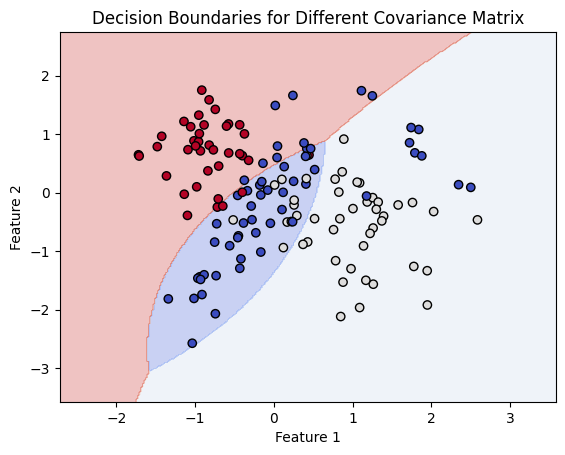

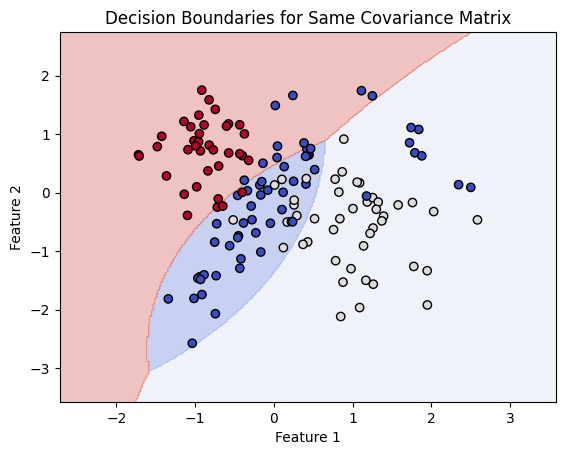

In [6]:
# Create a meshgrid to plot decision boundaries
for i in range(2):
    h = .02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    mesh_predictions = model.predict(np.c_[xx.ravel(), yy.ravel()], y_test, True)

    # Reshape predictions to match the shape of meshgrid
    mesh_predictions = mesh_predictions.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, mesh_predictions, cmap=plt.cm.coolwarm, alpha=0.3)

    # Plot the actual data points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.values.ravel(), cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

    # Set labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if i:
        plt.title('Decision Boundaries for Same Covariance Matrix')
    else:
        plt.title('Decision Boundaries for Different Covariance Matrix')
    plt.show()

## Plots for corrently and incorrently classified sampples

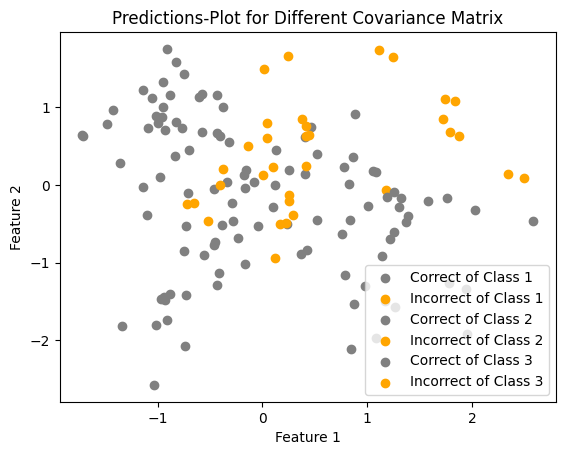

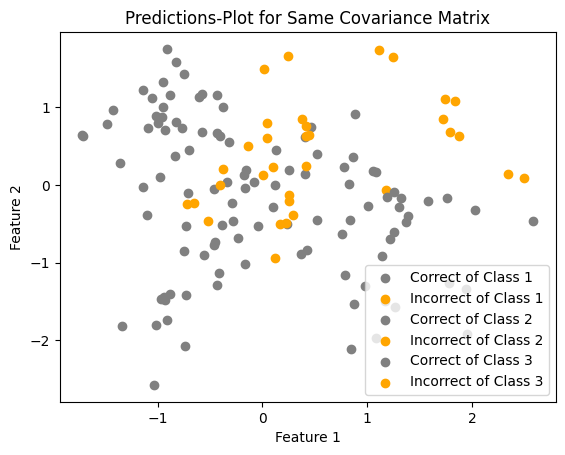

In [7]:
# Create a scatter plot for each class showing the samples that were classified correctly and wrongly

for i in range(2):
    colors = {1: 'red', 2: 'blue', 3: 'green', 'correct': 'gray', 'incorrect': 'orange'}

    for class_label in [1, 2, 3]:
        correct_class_data = X_test[(y_test['class'] == class_label) & (predictions == class_label)]
        incorrect_class_data = X_test[(y_test['class'] == class_label) & (predictions != class_label)]

        plt.scatter(correct_class_data[:, 0], correct_class_data[:, 1], c=colors['correct'], label=f'Correct of Class {class_label}')
        plt.scatter(incorrect_class_data[:, 0], incorrect_class_data[:, 1], c=colors['incorrect'], label=f'Incorrect of Class {class_label}')

    # Set labels and legend
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    if i:
        plt.title('Predictions-Plot for Same Covariance Matrix')
    else:
        plt.title('Predictions-Plot for Different Covariance Matrix')
    plt.legend()
    plt.show()